## Analyzing Marketing Opportunities for Web Developement Firm

This project's purpose is to illustrate and refine my statistical analysis skills, utilizing concepts like frequency tables and distributions of populations and samples.  I'll work with different measures of center like the mean, median and mode, depending on a variables distribution and type (nominal, ordinal, interval and ratio). Also we'll look at measures of difference like variance and standard deviation.  Then pulling it all together to examine relative differences and z-scores, as well as converting data to and from standardized distributions - allowing similar variables with different measurement scales to be reliably compared.

I'll be using a survey conducted by freeCodeCamp in 2017, their New Coder Survey, to try to identify especially lucrative markets towards which the company should channel their advertising budget.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/home/isaac/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
pd.reset_option('^display.', silent=True)

In [3]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
survey.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
Age                              15367 non-null float64
AttendedBootcamp                 17709 non-null float64
BootcampFinish                   1069 non-null float64
BootcampLoanYesNo                1079 non-null float64
BootcampName                     949 non-null object
BootcampRecommend                1073 non-null float64
ChildrenNumber                   2314 non-null float64
CityPopulation                   15354 non-null object
CodeEventConferences             1609 non-null float64
CodeEventDjangoGirls             165 non-null float64
CodeEventFCC                     1708 non-null float64
CodeEventGameJam                 290 non-null float64
CodeEventGirlDev                 297 non-null float64
CodeEventHackathons              1977 non-null float64
CodeEventMeetup                  2472 non-null float64
CodeEventNodeSchool              446 non-null float64
CodeEventNone 

In [10]:
survey.describe(include='all')

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,949,1073.000000,2314.000000,15354,1609.0,165.0,...,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,1214,201.0,2960.0
unique,NaN,NaN,NaN,NaN,141,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736,NaN,NaN
top,NaN,NaN,NaN,NaN,General Assembly,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN
freq,NaN,NaN,NaN,NaN,58,NaN,NaN,6534,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN
mean,27.691872,0.062002,0.699719,0.305839,NaN,0.818267,1.832325,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,NaN,0.385805,0.972813,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,NaN,1.000000,2.000000,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,NaN,1.000000,2.000000,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0


The survey columns contain information regarding how they've been learning to code (bootcamps, podcasts, etc.) what types of roles participants are interested in pursuing, financial questions like how much debt they have, how many dependents, and how much money they're willing to spend to learn to code.  Also included are demographics questions like what country and city they're from and their ethnicities.

Next we look at the 'JobRoleInterest' category to see if this sample is representative of the population we're interested in: that is people looking to learn primarily Web & Mobile Developement, but also other related topics

In [26]:
survey['JobRoleInterest'].value_counts(normalize=True
                                      )

Full-Stack Web Developer                                                                                                                                                                                                                                                    0.117706
  Front-End Web Developer                                                                                                                                                                                                                                                   0.064359
  Data Scientist                                                                                                                                                                                                                                                            0.021739
Back-End Web Developer                                                                                                                                                   

We see from the frequency table above that many people are interested in more than one topic, which is good because our company does produce content on more than just Web and Mobile Developement, however we'll create another frequency table to isolate these fields.

In [54]:
survey['JobRoleInterest'].str.contains(r"(Mobile)|(Web) Developer").value_counts()

/home/isaac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


True     6030
False     962
Name: JobRoleInterest, dtype: int64

In this sample we see that of the 6992 participants who responded to the question, 6030 are interested in learning Web Developement, Mobile Development, or both.
To better visualize the distribution of interests I'll create a pie chart with four categories: Interested in Web Developement, Interested in Mobile Developement, Interested in Both, Not interested in either.

In [62]:
job_interests = survey['JobRoleInterest'].dropna().reset_index(drop=True)

In [68]:
job_interests[~job_interests.str.contains("Web Developer")].str.contains("Mobile").value_counts()

False    962
True     254
Name: JobRoleInterest, dtype: int64

In [69]:
job_interests[~job_interests.str.contains("Mobile Developer")].str.contains("Web").value_counts()

True     3730
False     958
Name: JobRoleInterest, dtype: int64

So now we see that of the 6992 non-null values, 254 people are interested in Mobile but not web development, 3730 in web and not mobile development, leaving 2046 interested in both.

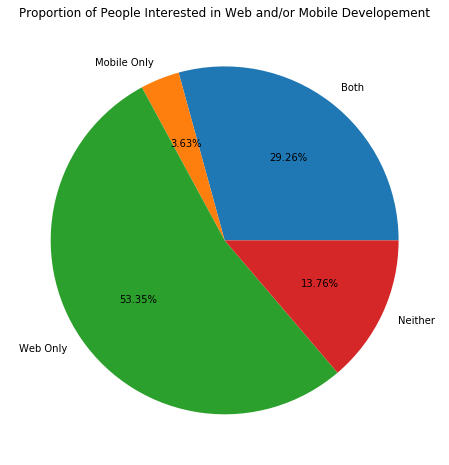

In [82]:
fig = plt.figure(figsize=(8,8))
plt.pie([2046,254,3730,962], labels=['Both', 'Mobile Only', 'Web Only', 'Neither'], autopct='%.2f%%')
plt.title('Proportion of People Interested in Web and/or Mobile Developement')
plt.show()

In [85]:
interest_drop = survey[survey['JobRoleInterest'].notnull()]

In [90]:
interest_drop[interest_drop['JobRoleInterest'].str.contains(r"(Mobile)|(Web) Developer")]['CountryLive'].value_counts(dropna=False)

/home/isaac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


United States of America         2676
India                             443
United Kingdom                    281
Canada                            221
NaN                               128
Poland                            121
Brazil                            115
Germany                           107
Russia                             93
Australia                          88
Ukraine                            86
Nigeria                            75
France                             67
Spain                              63
Romania                            61
Italy                              53
Netherlands (Holland, Europe)      53
Serbia                             52
Philippines                        47
Greece                             37
Ireland                            37
Mexico                             33
South Africa                       32
Hungary                            31
Croatia                            31
Turkey                             29
New Zealand 

Upon examining the frequency of countries where people mentioned that they're intereset in web/mobile developement, the two best countries to target our advertising are the USA and India.

In [92]:
interest_drop['SpendingPerMonth'] = interest_drop['MoneyForLearning'] / interest_drop['MonthsProgramming'].replace(0, 1)

/home/isaac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
interest_drop['SpendingPerMonth'].isnull().value_counts()

False    6317
True      675
Name: SpendingPerMonth, dtype: int64

Now we're looking at how much money people are willing to spend per month. Above I created a new column by dividing 'MoneyForLearning' by 'MonthsProgramming'.  To ensure I didn't divide by 0 I replaced all 0s with 1s.
There are 675 observations in the column with null entries.

In [99]:
survey_cleaner = interest_drop.loc[interest_drop['CountryLive'].notnull() & interest_drop['SpendingPerMonth'].notnull()]

In [100]:
survey_cleaner.shape

(6212, 137)

Removed rows with null entries in either 'CountryLive' or 'SpendingPerMonth'.
Then grouping data by country

In [141]:
country_groups = survey_cleaner[survey_cleaner.CountryLive.isin(['United States of America', 'India', 'Canada', 'United Kingdom'])].groupby('CountryLive')

In [142]:
country_groups.agg(np.mean)['SpendingPerMonth']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: SpendingPerMonth, dtype: float64

In [143]:
country_groups.agg(np.median)['SpendingPerMonth']

CountryLive
Canada                      0.000000
India                       0.000000
United Kingdom              0.000000
United States of America    3.333333
Name: SpendingPerMonth, dtype: float64

Comparing the mean spending per month of residents in the US, India, Canada and the UK we see that people in the USA spend the most at 228/month, and the UK least at only about 45.50/month.

However, the data is not so straightforward as once you look at the median you can see that it is much less than the mean.  Only $3.33/month in the US and then 0 for the other three countries.  This indicates that the distribution is heavily left skewed, with the vast majority of respondents not spending any money.

Additionally it is surprising that the mean for India is so much higher than for Canada and the UK, given that the latters' GDP per capita is much higher than India's is.  Perhaps there are some outliers that should be looked into.

In [125]:
import seaborn as sns

(0, 4000)

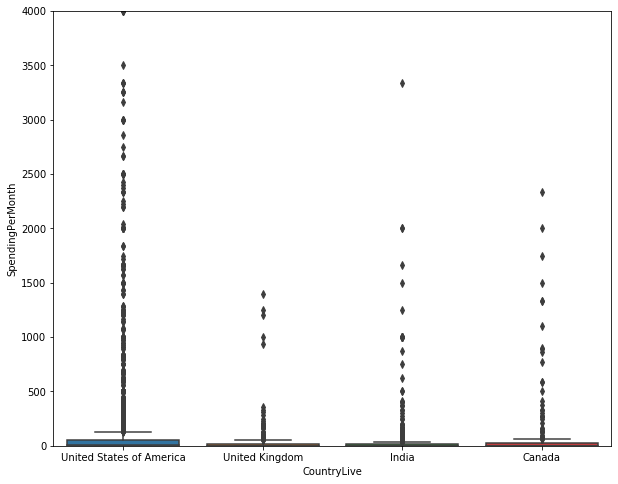

In [218]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'CountryLive', y = 'SpendingPerMonth', data = survey_cleaner[survey_cleaner['CountryLive'].isin(['United States of America', 'India', 'Canada', 'United Kingdom'])])
plt.ylim(0,4000)

There are a huge number of outliers across the distribution, let's remove them and create a new boxplot

In [221]:
country_groups.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])['SpendingPerMonth']

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
CountryLive,,,,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,212.500000,592.803030,1902.500000,5000.0
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,163.333333,491.650000,3650.000000,10000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,92.727273,200.000000,1044.000000,1400.0
United States of America,2933.0,227.997996,1940.245614,0.0,0.0,3.333333,50.000000,300.000000,833.333333,3333.333333,80000.0


By using several different percentiles at which to set the maximum outlier we can vary the mean and median of each countries distribution, while maintaining consistent across the distributions.

Below I've chosen to work with the 95th percentile for each country as the maximum outlier value. I.e. any spending value for a customer in Canada over $592.81 was omitted.

In [219]:
Q1 = [0,0,0,0]
Q3 = [25, 13.25, 20.4166, 50]
Q2 = [0,0,0,3.333]

IQR = pd.DataFrame([Q1, Q2, Q3], columns = ['Canada', 'India', 'United Kingdom', 'United States of America']).T
IQR['range'] = IQR[2] - IQR[0]
IQR['mild'] = IQR[2] + IQR['range'] * 1.5
IQR['extreme'] = IQR[2] + IQR['range'] * 3
IQR['largest'] = IQR[2] + IQR['range'] * 5

In [220]:
IQR

,0,1,2,range,mild,extreme,largest
Canada,0.0,0.000,25.0000,25.0000,62.5000,100.0000,150.0000
India,0.0,0.000,13.2500,13.2500,33.1250,53.0000,79.5000
United Kingdom,0.0,0.000,20.4166,20.4166,51.0415,81.6664,122.4996
United States of America,0.0,3.333,50.0000,50.0000,125.0000,200.0000,300.0000


In [171]:
four_countries = survey_cleaner[survey_cleaner['CountryLive'].isin(['United States of America', 'India', 'Canada', 'United Kingdom'])]

In [183]:
four_countries = four_countries[['CountryLive', 'SpendingPerMonth']]

In [231]:
def rm_outliers(df):
    maxx = {'Canada':592.81, 'India':491.66, 'United Kingdom': 200.1, 'United States of America':834}
    if df[1] > maxx[df[0]]:
        return False
    else:
        return True

Text(0.5, 1.0, 'Boxplots of Country values, excluding outliers in top 5%')

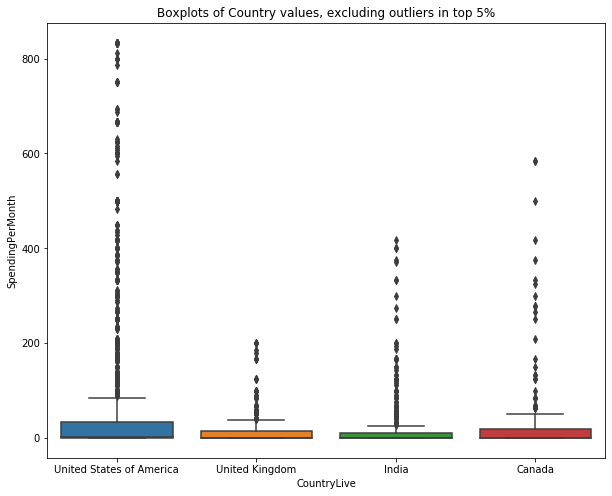

In [233]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(x = 'CountryLive', y = 'SpendingPerMonth', data = four_countries[four_countries.apply(rm_outliers, axis=1)])
plt.title('Boxplots of Country values, excluding outliers in top 5%')

In [234]:
group_two = four_countries[four_countries.apply(rm_outliers, axis=1)].groupby('CountryLive')

In [235]:
group_two.agg([np.mean, np.median])

SpendingPerMonth       
                                     mean median
CountryLive                                     
Canada                          32.721555    0.0
India                           23.656237    0.0
United Kingdom                  18.539863    0.0
United States of America        52.849456    2.0

To help determine which second country to advertise in, in addition to the US, let's look at how many people in each country currently spends more than $59 a month

In [270]:
four_countries[four_countries['SpendingPerMonth'] >= 59]['CountryLive'].value_counts()

United States of America    664
India                        75
United Kingdom               43
Canada                       40
Name: CountryLive, dtype: int64

There we can see India has the most people after the USA who already spend more than $75 a month, hence our best course of action would be to include India in our advertising campaign.

In [271]:
without_outliers = four_countries[four_countries.apply(rm_outliers, axis=1)]

In [272]:
without_outliers[without_outliers['SpendingPerMonth'] >= 59]['CountryLive'].value_counts()

United States of America    525
India                        51
United Kingdom               31
Canada                       28
Name: CountryLive, dtype: int64

Even without outliers, there are still more people who currently spend $59 per month in India than either in Canada or the UK.  With such a small sample size however, the survey used for this analysis may not be reliable enough to chose one of the three countries with certainty.

In [278]:
tot_india = survey[survey.CountryLive == 'India'].shape[0]
tot_canada = survey[survey.CountryLive == 'Canada'].shape[0]

pct_india = 51/tot_india
pct_canada = 28/tot_canada
survey[survey.CountryLive == 'United Kingdom'].shape[0]

757

In [283]:
print("%.2f%% of Respondents in India currently pay" % (pct_india*100))
print("%.2f%% of Respondents in Canada currently pay" % (pct_canada*100))
print("%.2f%% of Respondents in the UK currently pay" % (3100/757))

3.64% of Respondents in India currently pay
4.55% of Respondents in Canada currently pay
4.10% of Respondents in the UK currently pay
